<a href="https://colab.research.google.com/github/yaolihua081/Stanford-CS06dataviz/blob/main/fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.style as style
style.use('fivethirtyeight')

Check srock data for tie series and altair plot

In [ ]:
air_passenger_data = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')

In [ ]:
from google.colab import files
files.upload()

Saving AABA_2006-01-01_to_2018-01-01.csv to AABA_2006-01-01_to_2018-01-01.csv


{'AABA_2006-01-01_to_2018-01-01.csv': b'Date,Open,High,Low,Close,Volume,Name\r\n2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA\r\n2006-01-04,41.22,41.9,40.77,40.97,20553479,AABA\r\n2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA\r\n2006-01-06,42.88,43.57,42.8,43.21,29422828,AABA\r\n2006-01-09,43.1,43.66,42.82,43.42,16268338,AABA\r\n2006-01-10,42.96,43.34,42.34,42.98,16288580,AABA\r\n2006-01-11,42.19,42.31,41.72,41.87,26192772,AABA\r\n2006-01-12,41.92,41.99,40.76,40.89,18921686,AABA\r\n2006-01-13,41.0,41.08,39.62,39.9,30966185,AABA\r\n2006-01-17,39.09,40.39,38.96,40.11,42429911,AABA\r\n2006-01-18,35.01,36.16,34.74,35.18,118670393,AABA\r\n2006-01-19,35.82,35.84,34.24,34.33,60918436,AABA\r\n2006-01-20,34.44,34.66,33.21,33.74,57681688,AABA\r\n2006-01-23,34.22,34.4,33.98,34.17,30894265,AABA\r\n2006-01-24,34.55,35.2,34.51,34.87,31686324,AABA\r\n2006-01-25,35.43,35.48,34.38,34.49,23786001,AABA\r\n2006-01-26,34.94,35.25,34.49,35.17,28480917,AABA\r\n2006-01-27,35.26,35.27,34.66,35.09,2432596

In [ ]:
AABA_data=pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv')
AABA_data.dropna()

AABA_data['month']=pd.DatetimeIndex(AABA_data['Date']).month
AABA_data['year']=pd.DatetimeIndex(AABA_data['Date']).year
AABA_data['H_L_Diff']=AABA_data['High']-AABA_data['Low']
AABA_data.head()

,Date,Open,High,Low,Close,Volume,Name,month,year,H_L_Diff
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,1,2006,2.43
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,1,2006,1.13
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,1,2006,0.88
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,1,2006,0.77
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,1,2006,0.84


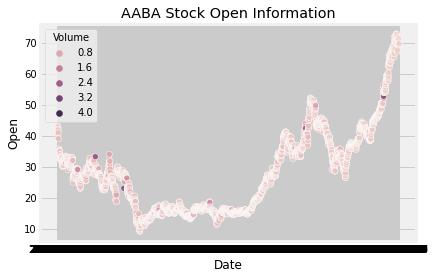

In [ ]:
figsize=(15,15)
sns.scatterplot(x='Date', y='Open', hue='Volume', data=AABA_data)
#sns.scatterplot(x='Date', y='High', hue='Volume', data=AABA_data)
plt.title('AABA Stock Open Information')
plt.show()
#style.use('fivethirtyeight')

In [ ]:
AABA_chart=alt.Chart(AABA_data,title='AABA Stock Price').mark_point().encode(
    x='year:N',
    y='mean(Open):Q',
    color='H_L_Diff:Q',
    tooltip='High:Q'
).interactive()
AABA_chart.save('AABA_chart.html')

from google.colab import files
files.download('AABA_chart.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
AABA_chart

alt.Chart(...)

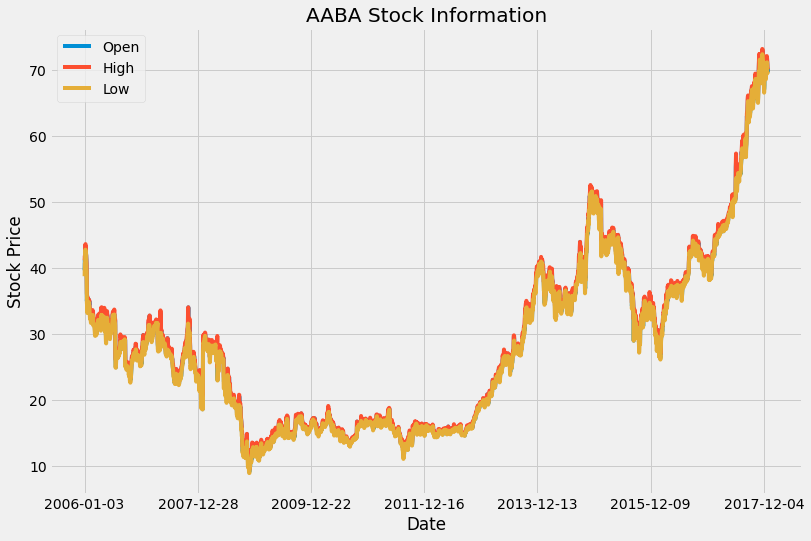

In [ ]:
AABA_data_open=AABA_data[['Date','Open','High','Low']]
plt.style.use('fivethirtyeight')
ax = AABA_data_open.set_index('Date').plot(figsize=(12, 8))
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')
ax.set_title('AABA Stock Information')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
AABA_data.rename(columns={"Date": "ds", "Open": 'y'}, inplace=True)
AABA_data.tail()
my_model = Prophet(interval_width=.95)
my_model.fit(AABA_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
#future_dates.tail()

future_dates=my_model.make_future_dataframe(periods=365, freq='D')
future_dates.tail()

,ds
3379,2018-12-25
3380,2018-12-26
3381,2018-12-27
3382,2018-12-28
3383,2018-12-29


In [ ]:
forecast = my_model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-03,35.456109,28.569737,41.501300,35.456109,35.456109,-0.175403,-0.175403,-0.175403,-0.678179,-0.678179,-0.678179,0.502777,0.502777,0.502777,0.0,0.0,0.0,35.280706
1,2006-01-04,35.433118,29.068331,41.318769,35.433118,35.433118,-0.212888,-0.212888,-0.212888,-0.702651,-0.702651,-0.702651,0.489763,0.489763,0.489763,0.0,0.0,0.0,35.220230
2,2006-01-05,35.410127,28.964275,41.462947,35.410127,35.410127,-0.191232,-0.191232,-0.191232,-0.663399,-0.663399,-0.663399,0.472167,0.472167,0.472167,0.0,0.0,0.0,35.218894
3,2006-01-06,35.387136,28.832382,41.320757,35.387136,35.387136,-0.188461,-0.188461,-0.188461,-0.637757,-0.637757,-0.637757,0.449296,0.449296,0.449296,0.0,0.0,0.0,35.198675
4,2006-01-09,35.318162,28.817295,41.821900,35.318162,35.318162,-0.258710,-0.258710,-0.258710,-0.602467,-0.602467,-0.602467,0.343757,0.343757,0.343757,0.0,0.0,0.0,35.059452


In [ ]:
forecast.rename(columns={"ds": "Date", "yhat": 'Open'}, inplace=True)
forecast.tail()

,Date,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Open
3379,2018-12-25,77.028429,59.821801,95.609175,59.718046,95.474953,-0.131265,-0.131265,-0.131265,-0.678179,-0.678179,-0.678179,0.546914,0.546914,0.546914,0.0,0.0,0.0,76.897164
3380,2018-12-26,77.067222,59.340540,96.560927,59.738711,95.623684,-0.163260,-0.163260,-0.163260,-0.702651,-0.702651,-0.702651,0.539391,0.539391,0.539391,0.0,0.0,0.0,76.903962
3381,2018-12-27,77.106016,58.863122,96.064777,59.759376,95.772415,-0.129397,-0.129397,-0.129397,-0.663399,-0.663399,-0.663399,0.534002,0.534002,0.534002,0.0,0.0,0.0,76.976619
3382,2018-12-28,77.144809,59.416727,96.036528,59.780041,95.921146,-0.107473,-0.107473,-0.107473,-0.637757,-0.637757,-0.637757,0.530284,0.530284,0.530284,0.0,0.0,0.0,77.037336
3383,2018-12-29,77.183602,61.909789,98.650143,59.800706,96.039014,2.169891,2.169891,2.169891,1.642227,1.642227,1.642227,0.527664,0.527664,0.527664,0.0,0.0,0.0,79.353493


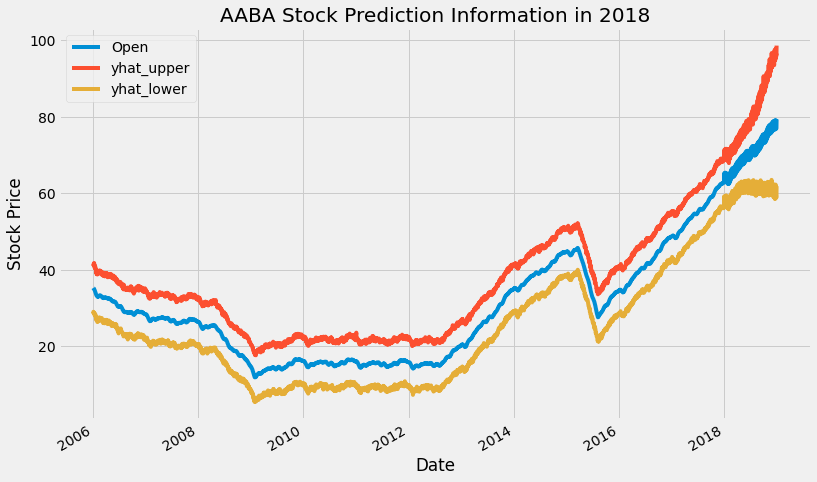

In [ ]:
forecast_modify=forecast[['Date','Open','yhat_upper','yhat_lower']]
plt.style.use('fivethirtyeight')
ax = forecast_modify.set_index('Date').plot(figsize=(12, 8))
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')
ax.set_title('AABA Stock Prediction Information in 2018')
plt.show()

In [ ]:

alt.Chart(forecast, title='AABA Stck prediction for 2018').mark_point().encode(
    x='Date:N',
    y='Open:Q'
).interactive()

alt.Chart(...)

In [ ]:
forecast

,Date,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Open
0,2006-01-03,35.456109,28.569737,41.501300,35.456109,35.456109,-0.175403,-0.175403,-0.175403,-0.678179,-0.678179,-0.678179,0.502777,0.502777,0.502777,0.0,0.0,0.0,35.280706
1,2006-01-04,35.433118,29.068331,41.318769,35.433118,35.433118,-0.212888,-0.212888,-0.212888,-0.702651,-0.702651,-0.702651,0.489763,0.489763,0.489763,0.0,0.0,0.0,35.220230
2,2006-01-05,35.410127,28.964275,41.462947,35.410127,35.410127,-0.191232,-0.191232,-0.191232,-0.663399,-0.663399,-0.663399,0.472167,0.472167,0.472167,0.0,0.0,0.0,35.218894
3,2006-01-06,35.387136,28.832382,41.320757,35.387136,35.387136,-0.188461,-0.188461,-0.188461,-0.637757,-0.637757,-0.637757,0.449296,0.449296,0.449296,0.0,0.0,0.0,35.198675
4,2006-01-09,35.318162,28.817295,41.821900,35.318162,35.318162,-0.258710,-0.258710,-0.258710,-0.602467,-0.602467,-0.602467,0.343757,0.343757,0.343757,0.0,0.0,0.0,35.059452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,2018-12-25,77.028429,59.821801,95.609175,59.718046,95.474953,-0.131265,-0.131265,-0.131265,-0.678179,-0.678179,-0.678179,0.546914,0.546914,0.546914,0.0,0.0,0.0,76.897164
3380,2018-12-26,77.067222,59.340540,96.560927,59.738711,95.623684,-0.163260,-0.163260,-0.163260,-0.702651,-0.702651,-0.702651,0.539391,0.539391,0.539391,0.0,0.0,0.0,76.903962
3381,2018-12-27,77.106016,58.863122,96.064777,59.759376,95.772415,-0.129397,-0.129397,-0.129397,-0.663399,-0.663399,-0.663399,0.534002,0.534002,0.534002,0.0,0.0,0.0,76.976619
3382,2018-12-28,77.144809,59.416727,96.036528,59.780041,95.921146,-0.107473,-0.107473,-0.107473,-0.637757,-0.637757,-0.637757,0.530284,0.530284,0.530284,0.0,0.0,0.0,77.037336


KeyError: ignored

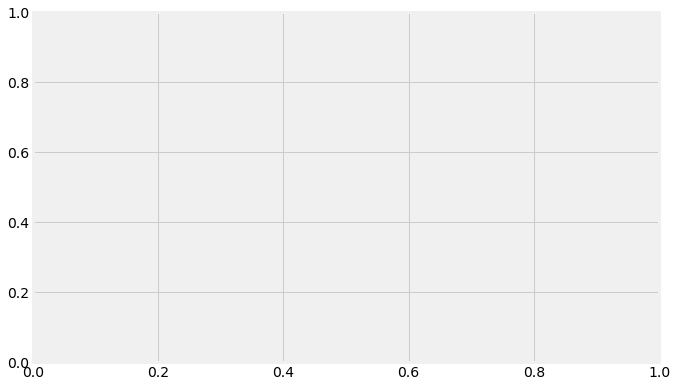

In [ ]:
my_model.plot(forecast)
plt.title('AABA Stck prediction for 1018')

KeyError: ignored

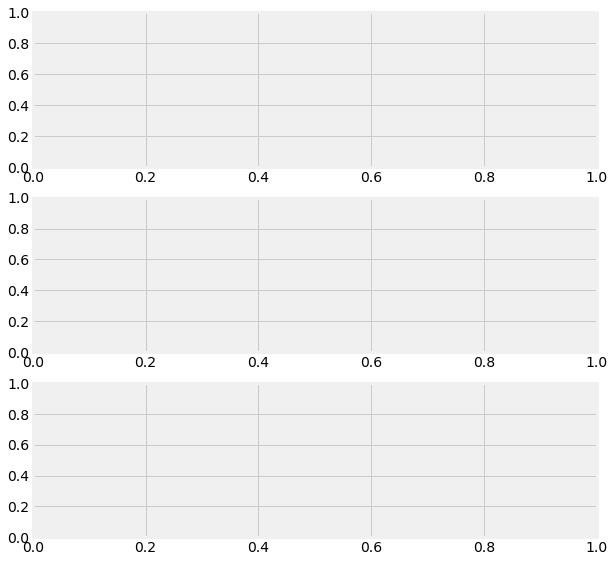

In [ ]:
my_model.plot_components(forecast)

KeyError: ignored

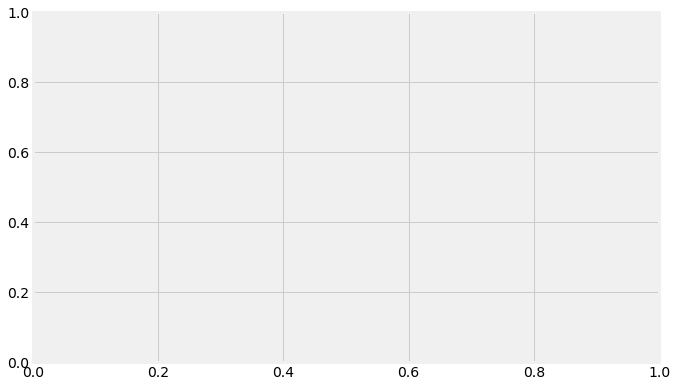

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig_air = my_model.plot(forecast)
a = add_changepoints_to_plot(fig_air.gca(), my_model, forecast)

In [ ]:
my_model_mult = Prophet(interval_width=.95, seasonality_mode='multiplicative')

In [ ]:
my_model_mult.fit(AABA_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = my_model_mult.predict(future_dates)

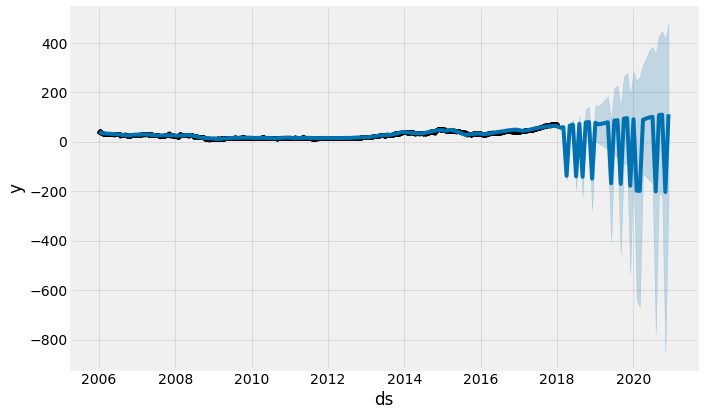

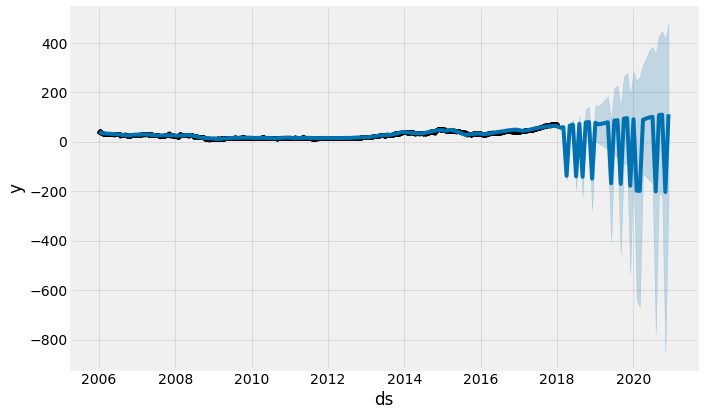

In [ ]:
my_model_mult.plot(forecast)